In [1]:
from collections import Counter
from multiprocessing import Pool
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
from tqdm import tqdm
import import_ipynb
import itertools
import json
import sys

In [2]:
from metric_util_func import *

importing Jupyter notebook from metric_util_func.ipynb


In [3]:
folder="../dataset_v5/v5_2/"

In [4]:
save_dir = "graphs_v5_2_7_2"

In [5]:
mod_ment2 = pd.read_csv(folder+'v5_2_2/'+'final_shodhganga_dataset_v5_2_7_2.csv', sep =",")

In [6]:
mod_ment2['upper_ddc_code'] = mod_ment2['ddc_code'].apply(lambda x : eval(x)[0] if len(eval(x))>0 else x)

In [7]:
mod_ment2.columns

Index(['advisorId', 'researcherId', 'advId', 'resId', 'advisor_name',
       'researcher_name', 'publisher_dept', 'DepartmentId',
       'publisher_institution', 'instituteId', 'title', 'thesisId',
       'N_thesisId', 'date_submitted', 'new_date_awarded', 'dc.date.awarded',
       'dc.subject.ddc', 'uniq_ddc_across_dept', 'dc.description.abstract',
       'dc.title.alternative', 'N_DepartmentId_1', 'ddc_code', 'advisor_advId',
       'researcher_resId', 'upper_ddc_code'],
      dtype='object')

In [8]:
inx_to_ddc_name ={"000": "Computer science, information & general works",
"100": "Philosophy & psychology",
"200": "Religion",
"300": "Social sciences",
"400": "Language",
"500": "Science",
"600": "Technology",
"700": "Arts & recreation",
"800": "Literature",
"900": "History & geography",
"()":"missing"
}

In [9]:
#inx_to_ddc_name

In [10]:
# rank_list1,ax1=draw_rank_dist(df=mod_ment2, inx_to_inst=inx_to_ddc_name,from_y=1940, to_y=2020, step_size=10, title="", attr='upper_ddc_code', func3=ntw_graph_ddc)
# fig1=ax1.get_figure()#DDC Rank (Based on thesis) Distance Plot over time
# fig1.savefig('graphs/ddc_plot_with_thesis.png',bbox_inches='tight')

In [11]:
# rank_list1_1,ax1_1=draw_rank_dist(df=mod_ment2, inx_to_inst=inx_to_ddc_name,from_y=1940, to_y=2020, step_size=5, title="DDC Rank (Based on thesis) Distance Plot over time", attr='upper_ddc_code',func3=ntw_graph_ddc)

In [12]:
# rank_list2, ax2 = draw_rank_dist(df=mod_ment2, metric=2,inx_to_inst=inx_to_ddc_name,from_y=1940, to_y=2020, step_size=10, title="", attr='upper_ddc_code', func3=ntw_graph_ddc,func2=other_metrics1, func1=inst_wise_val)
# fig2=ax2.get_figure()#DDC Rank (Based on Fertility values) Distance Plot over time
# fig2.savefig('graphs/ddc_plot_with_fertility.png',bbox_inches='tight')

In [13]:
# rank_list3, ax3 = draw_rank_dist(df=mod_ment2, metric=3,inx_to_inst=inx_to_ddc_name,from_y=1940, to_y=2020, step_size=10, title="", attr='upper_ddc_code', func3=ntw_graph_ddc,func2=other_metrics1, func1=inst_wise_val)
# fig3=ax3.get_figure()#DDC Rank (Based on h-index values) Distance Plot over time
# fig3.savefig('graphs/ddc_plot_with_h_index.png',bbox_inches='tight')

In [14]:
# rank_list4, ax4 = draw_rank_dist(df=mod_ment2, metric=4,inx_to_inst=inx_to_ddc_name,from_y=1940, to_y=2020, step_size=10, title="", attr='upper_ddc_code', func3=ntw_graph_ddc,func2=other_metrics1, func1=inst_wise_val)
# fig4=ax4.get_figure()#DDC Rank (Based on g-index values) Distance Plot over time
# fig4.savefig('graphs/ddc_plot_with_g_index.png',bbox_inches='tight')

In [15]:
# rank_list2, ax2 = draw_rank_dist(df=mod_ment2, metric=5,inx_to_inst=inx_to_ddc_name,from_y=1940, to_y=2020, step_size=10, title="DDC Rank (Based on g-index values) Distance Plot over time", attr='upper_ddc_code', func3=ntw_graph_ddc,func2=other_metrics1, func1=inst_wise_val)

In [16]:
import cmasher as cmr

In [19]:
def draw_area_plot(df=None, inx_to_inst=None, from_y=1940, to_y=2020, step_size=10, func1=Counter, func2=thesis_advised_cumlative, metric=0, title="", attr="instituteId", func3=ntw_graph_with_instId):
    top_dict_list=[]
    comp_dist_list=[]
    xlabels=[]
    for year in range(from_y, to_y+step_size, step_size):
        comp_dist, top_dict = func2(df, metric=metric, till_date=f'{year}-01-01', func1=func1, attr=attr, func3=func3)
        top_dict_list.append(top_dict)
        comp_dist_list.append(comp_dist)
        xlabels.append(year)
    uniq_inst=[]
    inst_year={}
    for dict1 in top_dict_list:
        uniq_inst+=list(dict1.keys())
    for inst in set(uniq_inst):
        for dict1 in comp_dist_list:
            if inst in inst_year:
                inst_year[inst].append(dict1.get(inst,0))
            else:
                inst_year[inst]=[]
                inst_year[inst].append(dict1.get(inst,0))
    #xlabels = [a+step_size for a in range(from_y, to_y, step_size)]
    print(xlabels)
    inst_year = {inx_to_inst[key]: inst_year[key] for key in inst_year}
    print(list(inst_year.values()))
    print(list(inst_year.keys()))
#     NUM_COLORS = len(inst_year)
    #graph plot
    #cm = plt.get_cmap('plasma')
    #slicedCM = cmap(np.linspace(0, 1, len(list((inst_year.values()))))) 
    colors = cmr.take_cmap_colors('tab20_r', len(list(inst_year.values())))
    fig, ax = plt.subplots(figsize=(12,10))
#     colors = sns.color_palette("hls", NUM_COLORS)
#     ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.stackplot(xlabels,list(inst_year.values()), labels=list(inst_year.keys()),colors=colors)
    plt.yticks(fontsize=18, fontweight='bold')
    plt.xticks(fontsize=18, fontweight='bold')
    handles, labels = ax.get_legend_handles_labels()
    print(labels)
#     sort both labels and handles by labels
#     labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    ax.legend(handles[::-1], labels[::-1],loc='upper left',fancybox=True, shadow=True,prop={"weight":'bold',"size":16}) #size=12
    ax.set_xlabel('Year',fontweight='bold',fontsize=20)
    ax.set_ylabel('Thesis Advised',fontweight='bold',fontsize=20)
    ax.set_title(title)
    plt.show()
    return inst_year, ax


In [20]:
#cmr.take_cmap_colors

[1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
[[0, 0, 8, 83, 192, 367, 707, 1521, 3111], [0, 0, 2, 7, 24, 65, 166, 317, 476], [0, 3, 17, 158, 521, 1262, 2276, 3812, 5793], [0, 0, 24, 123, 455, 1266, 2551, 4844, 7780], [0, 0, 0, 3, 36, 141, 456, 1620, 7266], [7, 7, 54, 413, 1501, 4524, 10750, 24120, 44420], [1, 1, 31, 164, 546, 1240, 3047, 9202, 26827], [8, 13, 255, 1782, 5516, 12058, 20629, 35134, 56377], [3, 4, 22, 95, 305, 933, 1984, 4442, 7122], [0, 0, 6, 43, 182, 355, 568, 890, 1905], [4, 6, 33, 213, 885, 2496, 5460, 10674, 16913]]
['missing', 'Religion', 'Philosophy & psychology', 'Language', 'Computer science, information & general works', 'Social sciences', 'Technology', 'Science', 'History & geography', 'Arts & recreation', 'Literature']
['missing', 'Religion', 'Philosophy & psychology', 'Language', 'Computer science, information & general works', 'Social sciences', 'Technology', 'Science', 'History & geography', 'Arts & recreation', 'Literature']


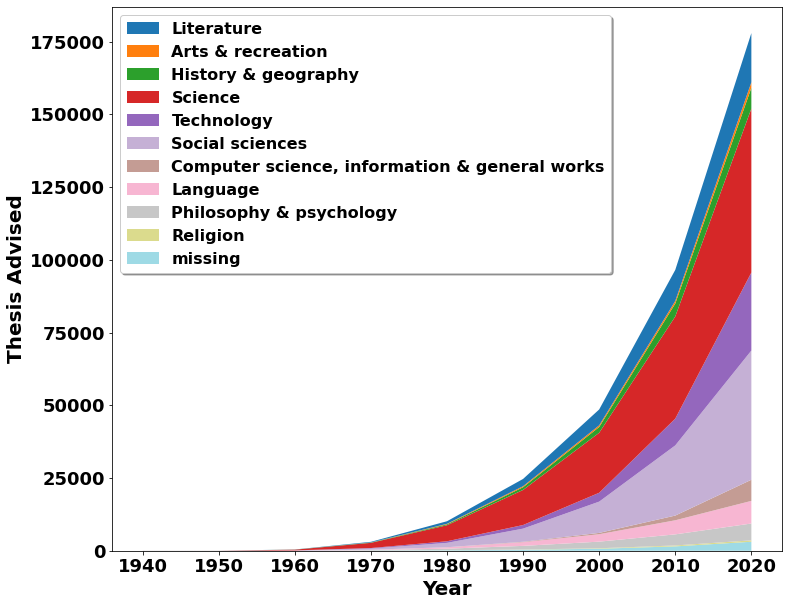

In [21]:
inst_year_wise_dist, ax5=draw_area_plot(df=mod_ment2, inx_to_inst=inx_to_ddc_name, from_y=1940, to_y=2020, step_size=10, title="", attr='upper_ddc_code', func3=ntw_graph_ddc)
fig5=ax5.get_figure()
fig5.savefig('../'+save_dir+'/ddc_stackplot_with_thesis.pdf',bbox_inches='tight')

In [121]:
'''
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 
'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 
'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 
'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 
'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 
'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 
'cividis', 'cividis_r', 'cmr.amber', 'cmr.amber_r', 'cmr.amethyst', 'cmr.amethyst_r', 'cmr.apple', 'cmr.apple_r', 
'cmr.arctic', 'cmr.arctic_r', 'cmr.bubblegum', 'cmr.bubblegum_r', 'cmr.chroma', 'cmr.chroma_r', 'cmr.copper', 
'cmr.copper_r', 'cmr.copper_s', 'cmr.copper_s_r', 'cmr.cosmic', 'cmr.cosmic_r', 'cmr.dusk', 'cmr.dusk_r', 
'cmr.eclipse', 'cmr.eclipse_r', 'cmr.ember', 'cmr.ember_r', 'cmr.emerald', 'cmr.emerald_r', 'cmr.emergency', 
'cmr.emergency_r', 'cmr.emergency_s', 'cmr.emergency_s_r', 'cmr.fall', 'cmr.fall_r', 'cmr.flamingo', 
'cmr.flamingo_r', 'cmr.freeze', 'cmr.freeze_r', 'cmr.fusion', 'cmr.fusion_r', 'cmr.gem', 'cmr.gem_r', 
'cmr.ghostlight', 'cmr.ghostlight_r', 'cmr.gothic', 'cmr.gothic_r', 'cmr.guppy', 'cmr.guppy_r', 'cmr.heat', 
'cmr.heat_r', 'cmr.holly', 'cmr.holly_r', 'cmr.horizon', 'cmr.horizon_r', 'cmr.iceburn', 'cmr.iceburn_r', 
'cmr.infinity', 'cmr.infinity_r', 'cmr.infinity_s', 'cmr.infinity_s_r', 'cmr.jungle', 'cmr.jungle_r', 
'cmr.lavender', 'cmr.lavender_r', 'cmr.lilac', 'cmr.lilac_r', 'cmr.neon', 'cmr.neon_r', 'cmr.neutral', 
'cmr.neutral_r', 'cmr.nuclear', 'cmr.nuclear_r', 'cmr.ocean', 'cmr.ocean_r', 'cmr.pepper', 'cmr.pepper_r', 
'cmr.pride', 'cmr.pride_r', 'cmr.prinsenvlag', 'cmr.prinsenvlag_r', 'cmr.rainforest', 'cmr.rainforest_r', 
'cmr.redshift', 'cmr.redshift_r', 'cmr.sapphire', 'cmr.sapphire_r', 'cmr.savanna', 'cmr.savanna_r', 
'cmr.seasons', 'cmr.seasons_r', 'cmr.seasons_s', 'cmr.seasons_s_r', 'cmr.seaweed', 'cmr.seaweed_r', 'cmr.sepia', 
'cmr.sepia_r', 'cmr.sunburst', 'cmr.sunburst_r', 'cmr.swamp', 'cmr.swamp_r', 'cmr.torch', 'cmr.torch_r', 
'cmr.toxic', 'cmr.toxic_r', 'cmr.tree', 'cmr.tree_r', 'cmr.tropical', 'cmr.tropical_r', 'cmr.viola', 
'cmr.viola_r', 'cmr.voltage', 'cmr.voltage_r', 'cmr.waterlily', 'cmr.waterlily_r', 'cmr.watermelon', 
'cmr.watermelon_r', 'cmr.wildfire', 'cmr.wildfire_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 
'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 
'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow',
'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 
'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 
'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 
'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic',
'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 
'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 
'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
'''


"\n'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', \n'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', \n'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', \n'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', \n'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', \n'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', \n'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', \n'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', \n'cividis', 'cividis_r', 'cmr.amber', 'cmr.amber_r', 'cmr.amethyst', 'cmr.amethyst_r', 'cmr.apple', 'cmr.apple_r', \n'

In [ ]:
# [5,4,3,3,1]

In [122]:
l1, d1, rl1 = mod_draw_rank_dist(df=mod_ment2, inx_to_inst=inx_to_ddc_name,from_y=1940, to_y=2020, step_size=10, attr='upper_ddc_code', func3=ntw_graph_ddc)

l2, d2, rl2 = mod_draw_rank_dist(df=mod_ment2, metric=2,inx_to_inst=inx_to_ddc_name,from_y=1940, to_y=2020, step_size=10, attr='upper_ddc_code', func3=ntw_graph_ddc,func2=other_metrics1, func1=inst_wise_val)

l3, d3, rl3 = mod_draw_rank_dist(df=mod_ment2, metric=3,inx_to_inst=inx_to_ddc_name,from_y=1940, to_y=2020, step_size=10, attr='upper_ddc_code', func3=ntw_graph_ddc,func2=other_metrics1, func1=inst_wise_val)

l4, d4, rl4 = mod_draw_rank_dist(df=mod_ment2, metric=4,inx_to_inst=inx_to_ddc_name,from_y=1940, to_y=2020, step_size=10, attr='upper_ddc_code', func3=ntw_graph_ddc,func2=other_metrics1, func1=inst_wise_val)

9
9
9
9


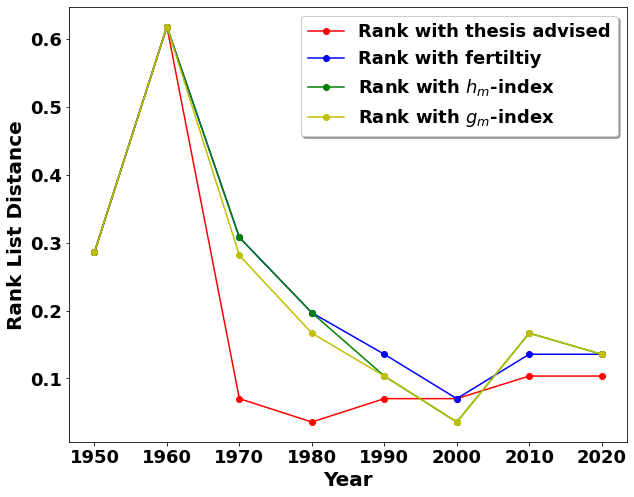

In [123]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(l1, d1, color="r", marker='o',label="Rank with thesis advised")
ax.plot(l2, d2, color="b", marker='o',label="Rank with fertiltiy")
ax.plot(l3, d3, color="g", marker='o',label="Rank with $h_m$-index")
ax.plot(l4, d4, color="y", marker='o',label="Rank with $g_m$-index")
plt.yticks(fontsize=18, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')
ax.set_title("")#DDC Subject codes Rank Distance Plot
ax.set_ylabel("Rank List Distance",fontsize=20,fontweight='bold')
ax.set_xlabel("Year",fontsize=20,fontweight='bold')
ax.legend(loc='upper right',fancybox=True, shadow=True,prop={"weight":'bold',"size":18})
plt.savefig('../'+save_dir+'/combined_ddc_rank_distance_plot.pdf',bbox_inches='tight')
plt.show()